In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [42]:
dengue_features_df = pd.read_csv("dengue_features_train.csv")
dengue_features_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [43]:
new_den_fea_df = dengue_features_df.copy()

In [44]:
new_den_fea_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [45]:
new_den_fea_df= new_den_fea_df.reindex(np.random.permutation(new_den_fea_df.index))

In [46]:
dengue_features_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [47]:
new_den_fea_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
179,sj,1993,40,1993-10-08,0.121300,0.070500,0.188629,0.165271,27.62,299.591429,...,55.36,83.841429,27.62,18.104286,1.671429,28.014286,7.500000,33.3,23.3,16.8
1442,iq,2010,12,2010-03-26,0.266286,0.301233,0.296000,0.295743,51.29,299.004286,...,214.90,93.082857,51.29,19.368571,8.028571,27.466667,9.333333,34.5,21.0,20.0
418,sj,1998,20,1998-05-14,NaN,0.042550,0.131783,0.100300,55.76,299.200000,...,10.30,78.401429,55.76,16.502857,3.628571,27.142857,7.014286,33.9,22.2,7.1
1395,iq,2009,18,2009-04-30,0.283586,0.345514,0.237443,0.316129,99.89,297.404286,...,93.80,95.078571,99.89,18.018571,6.271429,27.150000,10.750000,34.0,21.0,30.8
1173,iq,2005,3,2005-01-22,0.345933,0.311800,0.291000,0.337971,60.52,300.068571,...,26.70,83.300000,60.52,18.258571,11.357143,28.866667,11.166667,35.5,22.5,194.0


In [48]:
dengue_feature_labels = pd.read_csv("dengue_labels_train.csv")

In [49]:
dengue_features_df = pd.concat([dengue_features_df, dengue_feature_labels["total_cases"]], axis=1)

In [50]:
dengue_features_df.shape

(1456, 25)

In [51]:
dengue_features_df.keys()

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [53]:
dengue_features_df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [56]:
type(dengue_features_df["ndvi_ne"].head()[1])

numpy.float64

In [73]:
dengue_features_df["ndvi_ne"] = dengue_features_df["ndvi_ne"].fillna(dengue_features_df["ndvi_ne"].mean())
dengue_features_df["ndvi_nw"] = dengue_features_df["ndvi_nw"].fillna(dengue_features_df["ndvi_nw"].mean())
dengue_features_df["ndvi_se"] = dengue_features_df["ndvi_se"].fillna(dengue_features_df["ndvi_se"].mean())
dengue_features_df["ndvi_sw"] = dengue_features_df["ndvi_sw"].fillna(dengue_features_df["ndvi_sw"].mean())
dengue_features_df["precipitation_amt_mm"] = dengue_features_df["precipitation_amt_mm"]\
                                                .fillna(dengue_features_df["precipitation_amt_mm"].mean())
dengue_features_df["reanalysis_air_temp_k"] = dengue_features_df["reanalysis_air_temp_k"]\
                                                .fillna(dengue_features_df["reanalysis_air_temp_k"].mean())
dengue_features_df["reanalysis_avg_temp_k"] = dengue_features_df["reanalysis_avg_temp_k"]\
                                                .fillna(dengue_features_df["reanalysis_avg_temp_k"].mean())
dengue_features_df["reanalysis_dew_point_temp_k"] = dengue_features_df["reanalysis_dew_point_temp_k"]\
                                                .fillna(dengue_features_df["reanalysis_dew_point_temp_k"].mean())
dengue_features_df["reanalysis_max_air_temp_k"] = dengue_features_df["reanalysis_max_air_temp_k"]\
                                                .fillna(dengue_features_df["reanalysis_max_air_temp_k"].mean())
dengue_features_df["reanalysis_min_air_temp_k"] = dengue_features_df["reanalysis_min_air_temp_k"]\
                                                .fillna(dengue_features_df["reanalysis_min_air_temp_k"].mean())
dengue_features_df["reanalysis_precip_amt_kg_per_m2"] = dengue_features_df["reanalysis_precip_amt_kg_per_m2"]\
                                                .fillna(dengue_features_df["reanalysis_precip_amt_kg_per_m2"].mean())
dengue_features_df["reanalysis_relative_humidity_percent"] = dengue_features_df["reanalysis_relative_humidity_percent"]\
                                                .fillna(dengue_features_df["reanalysis_relative_humidity_percent"].mean())
dengue_features_df["reanalysis_sat_precip_amt_mm"] = dengue_features_df["reanalysis_sat_precip_amt_mm"]\
                                                .fillna(dengue_features_df["reanalysis_sat_precip_amt_mm"].mean())
dengue_features_df["reanalysis_specific_humidity_g_per_kg"] = dengue_features_df["reanalysis_specific_humidity_g_per_kg"]\
                                                .fillna(dengue_features_df["reanalysis_specific_humidity_g_per_kg"].mean())
dengue_features_df["reanalysis_tdtr_k"] = dengue_features_df["reanalysis_tdtr_k"]\
                                                .fillna(dengue_features_df["reanalysis_tdtr_k"].mean())
dengue_features_df["station_avg_temp_c"] = dengue_features_df["station_avg_temp_c"]\
                                                .fillna(dengue_features_df["station_avg_temp_c"].mean())
dengue_features_df["station_diur_temp_rng_c"] = dengue_features_df["station_diur_temp_rng_c"]\
                                                .fillna(dengue_features_df["station_diur_temp_rng_c"].mean())
dengue_features_df["station_max_temp_c"] = dengue_features_df["station_max_temp_c"]\
                                                .fillna(dengue_features_df["station_max_temp_c"].mean())
dengue_features_df["station_min_temp_c"] = dengue_features_df["station_min_temp_c"]\
                                                .fillna(dengue_features_df["station_min_temp_c"].mean())
dengue_features_df["station_precip_mm"] = dengue_features_df["station_precip_mm"]\
                                                .fillna(dengue_features_df["station_precip_mm"].mean())


In [74]:
dengue_features_df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [84]:
dengue_features_df.describe().keys()

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [78]:
dengue_features_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [94]:
new_den_fea_df = dengue_features_df.reindex(np.random.permutation(dengue_features_df.index))

In [95]:
new_den_fea_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
811,sj,2005,48,2005-12-03,0.142294,0.182300,0.268600,0.248186,26.65,299.182857,...,78.624286,26.65,16.571429,2.414286,26.228571,5.871429,30.6,22.8,80.7,26
76,sj,1991,42,1991-10-15,0.013700,0.128860,0.109043,0.107029,3.29,299.897143,...,79.382857,3.29,17.431429,2.300000,28.542857,7.628571,33.9,24.4,21.3,142
279,sj,1995,36,1995-09-10,0.107100,0.183600,0.185150,0.169957,20.23,301.218571,...,78.145714,20.23,18.545714,3.700000,29.571429,7.914286,34.4,23.9,20.4,40
71,sj,1991,37,1991-09-10,0.104750,0.159833,0.112080,0.144643,33.56,300.540000,...,78.627143,33.56,17.895714,3.042857,28.971429,7.700000,33.9,23.3,61.0,68
1140,iq,2004,23,2004-06-03,0.107300,0.117067,0.196786,0.110614,88.62,296.767143,...,94.692857,88.62,17.212857,8.185714,27.500000,9.500000,32.8,19.8,203.0,6


In [97]:
new_den_fea_df.city.unique()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_den_fea_df["city"] = encoder.fit_transform(new_den_fea_df["city"])

In [101]:
sorted(new_den_fea_df.year.unique(), )

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010]

In [102]:
new_den_fea_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 811 to 1334
Data columns (total 25 columns):
city                                     1456 non-null int64
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_preci

In [105]:
from datetime import datetime
seasons = [0,0,1,1,1,2,2,2,3,3,3,0]
new_den_fea_df["seasons"] = new_den_fea_df["week_start_date"].apply(lambda x: seasons[(datetime.strptime(x, "%Y-%m-%d").month-1)])

In [106]:
new_den_fea_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,seasons
811,1,2005,48,2005-12-03,0.142294,0.182300,0.268600,0.248186,26.65,299.182857,...,26.65,16.571429,2.414286,26.228571,5.871429,30.6,22.8,80.7,26,0
76,1,1991,42,1991-10-15,0.013700,0.128860,0.109043,0.107029,3.29,299.897143,...,3.29,17.431429,2.300000,28.542857,7.628571,33.9,24.4,21.3,142,3
279,1,1995,36,1995-09-10,0.107100,0.183600,0.185150,0.169957,20.23,301.218571,...,20.23,18.545714,3.700000,29.571429,7.914286,34.4,23.9,20.4,40,3
71,1,1991,37,1991-09-10,0.104750,0.159833,0.112080,0.144643,33.56,300.540000,...,33.56,17.895714,3.042857,28.971429,7.700000,33.9,23.3,61.0,68,3
1140,0,2004,23,2004-06-03,0.107300,0.117067,0.196786,0.110614,88.62,296.767143,...,88.62,17.212857,8.185714,27.500000,9.500000,32.8,19.8,203.0,6,2


In [108]:
from sklearn import tree
new_den_fea_df = new_den_fea_df.drop("week_start_date", axis=1)

In [110]:
new_den_fea_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 811 to 1334
Data columns (total 25 columns):
city                                     1456 non-null int64
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip_amt_kg_per_m2          1456 non-null float64
reanalysis_rela

In [113]:
new_den_fea_df.city = new_den_fea_df.city.astype("float64")
new_den_fea_df.year = new_den_fea_df.year.astype("float64")
new_den_fea_df.weekofyear = new_den_fea_df.weekofyear.astype("float64")
new_den_fea_df.seasons = new_den_fea_df.seasons.astype("float64")

In [114]:
new_den_fea_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 811 to 1334
Data columns (total 25 columns):
city                                     1456 non-null float64
year                                     1456 non-null float64
weekofyear                               1456 non-null float64
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip_amt_kg_per_m2          1456 non-null float64
reanalysi

In [115]:
y_df_vals = new_den_fea_df["total_cases"].copy()

In [120]:
x_df_vals = new_den_fea_df.drop("total_cases", axis=1)

In [122]:
x_vals = x_df_vals.values
y_vals = y_df_vals.values

In [129]:
y_vals = y_vals.reshape(y_vals.shape[0], 1)

In [131]:
dengTreeModel = tree.DecisionTreeRegressor(criterion="mae", splitter="best", random_state=40)
dengTreeModel.fit(x_vals, y_vals)

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=40, splitter='best')

In [132]:
den_test_df = pd.read_csv("dengue_features_test.csv")
den_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null object
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_per_m2  

In [135]:
den_test_df["seasons"] = den_test_df["week_start_date"].apply(lambda x : seasons[datetime.strptime(x, "%Y-%m-%d").month-1])

In [148]:
den_test_df["city"][den_test_df["city"] == "sj"] = 1
den_test_df["city"][den_test_df["city"] == "iq"] = 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [152]:
den_test_df.city = den_test_df.city.astype("float64")
den_test_df.year = den_test_df.year.astype("float64")
den_test_df.weekofyear = den_test_df.weekofyear.astype("float64")
den_test_df.seasons = den_test_df.seasons.astype("float64")

In [155]:
den_test_df = den_test_df.drop("week_start_date", axis=1)

In [162]:
den_test_df.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c                        9
station_precip_mm               

In [163]:
den_test_df["ndvi_ne"] = den_test_df["ndvi_ne"].fillna(den_test_df["ndvi_ne"].mean())
den_test_df["ndvi_nw"] = den_test_df["ndvi_nw"].fillna(den_test_df["ndvi_nw"].mean())
den_test_df["ndvi_se"] = den_test_df["ndvi_se"].fillna(den_test_df["ndvi_se"].mean())
den_test_df["ndvi_sw"] = den_test_df["ndvi_sw"].fillna(den_test_df["ndvi_sw"].mean())
den_test_df["precipitation_amt_mm"] = den_test_df["precipitation_amt_mm"]\
                                                .fillna(den_test_df["precipitation_amt_mm"].mean())
den_test_df["reanalysis_air_temp_k"] = den_test_df["reanalysis_air_temp_k"]\
                                                .fillna(den_test_df["reanalysis_air_temp_k"].mean())
den_test_df["reanalysis_avg_temp_k"] = den_test_df["reanalysis_avg_temp_k"]\
                                                .fillna(den_test_df["reanalysis_avg_temp_k"].mean())
den_test_df["reanalysis_dew_point_temp_k"] = den_test_df["reanalysis_dew_point_temp_k"]\
                                                .fillna(den_test_df["reanalysis_dew_point_temp_k"].mean())
den_test_df["reanalysis_max_air_temp_k"] = den_test_df["reanalysis_max_air_temp_k"]\
                                                .fillna(den_test_df["reanalysis_max_air_temp_k"].mean())
den_test_df["reanalysis_min_air_temp_k"] = den_test_df["reanalysis_min_air_temp_k"]\
                                                .fillna(den_test_df["reanalysis_min_air_temp_k"].mean())
den_test_df["reanalysis_precip_amt_kg_per_m2"] = den_test_df["reanalysis_precip_amt_kg_per_m2"]\
                                                .fillna(den_test_df["reanalysis_precip_amt_kg_per_m2"].mean())
den_test_df["reanalysis_relative_humidity_percent"] = den_test_df["reanalysis_relative_humidity_percent"]\
                                                .fillna(den_test_df["reanalysis_relative_humidity_percent"].mean())
den_test_df["reanalysis_sat_precip_amt_mm"] = den_test_df["reanalysis_sat_precip_amt_mm"]\
                                                .fillna(den_test_df["reanalysis_sat_precip_amt_mm"].mean())
den_test_df["reanalysis_specific_humidity_g_per_kg"] = den_test_df["reanalysis_specific_humidity_g_per_kg"]\
                                                .fillna(den_test_df["reanalysis_specific_humidity_g_per_kg"].mean())
den_test_df["reanalysis_tdtr_k"] = den_test_df["reanalysis_tdtr_k"]\
                                                .fillna(den_test_df["reanalysis_tdtr_k"].mean())
den_test_df["station_avg_temp_c"] = den_test_df["station_avg_temp_c"]\
                                                .fillna(den_test_df["station_avg_temp_c"].mean())
den_test_df["station_diur_temp_rng_c"] = den_test_df["station_diur_temp_rng_c"]\
                                                .fillna(den_test_df["station_diur_temp_rng_c"].mean())
den_test_df["station_max_temp_c"] = den_test_df["station_max_temp_c"]\
                                                .fillna(den_test_df["station_max_temp_c"].mean())
den_test_df["station_min_temp_c"] = den_test_df["station_min_temp_c"]\
                                                .fillna(den_test_df["station_min_temp_c"].mean())
den_test_df["station_precip_mm"] = den_test_df["station_precip_mm"]\
                                                .fillna(den_test_df["station_precip_mm"].mean())

In [177]:
den_test_preds = dengTreeModel.predict(x_df_vals.values)

In [184]:
den_test_preds = den_test_preds.astype(int)
mean_absolute_error(y_vals, den_test_preds)

0.0

In [185]:
from sklearn.metrics import accuracy_score

In [191]:
den_test_preds = den_test_preds.reshape(den_test_preds.shape[0], 1)

In [197]:
den_test_preds.shape

(1456, 1)

In [204]:
from sklearn.externals.six import StringIO   
from IPython.display import Image
import pydotplus

dot_data = StringIO()
tree.export_graphviz(dengTreeModel, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
image = Image(graph.create_png())

In [212]:
graph.write_png("/Users/b0206977/Desktop/den_image.png")

True

In [213]:
dengSVCModel = SVC(decision_function_shape="ovr", probability=True)
dengSVCModel.fit(x_vals, y_vals)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [215]:
mean_absolute_error(y_vals, dengSVCModel.predict(x_vals))

0.8578296703296703

In [246]:
test_preds_svc = dengSVCModel.predict(den_test_df)

In [217]:
test_preds_tree = dengTreeModel.predict(den_test_df)

In [220]:
from sklearn.ensemble import RandomForestRegressor

In [222]:
dengRFCModel = RandomForestRegressor(criterion="mae", random_state=40)
dengRFCModel.fit(x_vals, y_vals)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=40, verbose=0, warm_start=False)

In [223]:
dengRFCModel.score(x_vals, y_vals)

0.9107452442835945

In [224]:
dengTreeModel.score(x_vals, y_vals)

1.0

In [225]:
dengSVCModel.score(x_vals, y_vals)

0.9759615384615384

In [226]:
test_preds_rfc = dengRFCModel.predict(den_test_df)

In [227]:
dengRFCModel.feature_importances_

array([0.00045334, 0.23223865, 0.11740852, 0.02908195, 0.05056683,
       0.02560341, 0.03374269, 0.02305285, 0.04715213, 0.02542361,
       0.03872973, 0.01872013, 0.04156922, 0.03436001, 0.03033903,
       0.01678738, 0.03403964, 0.03328385, 0.03093345, 0.0454781 ,
       0.02555731, 0.01836723, 0.03536546, 0.01174547])

Text(0,0.5,'actual cases')

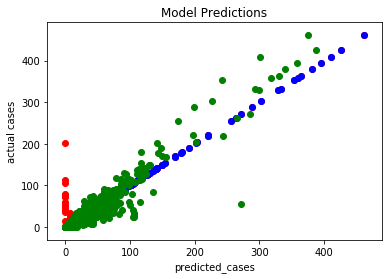

In [232]:
plt.scatter(dengSVCModel.predict(x_vals), y_vals, c="red")
plt.scatter(dengTreeModel.predict(x_vals), y_vals, c="blue")
plt.scatter(dengRFCModel.predict(x_vals), y_vals, c="green")
plt.title("Model Predictions")
plt.xlabel("predicted_cases")
plt.ylabel("actual cases")

In [234]:
ori_test_df = pd.read_csv("dengue_features_test.csv")
ori_test_df = ori_test_df.loc[:,["city", "year", "weekofyear"]]

In [252]:
test_preds_svc_df = pd.DataFrame(data = test_preds_svc, columns=["total_cases"])
test_preds_rfc_df = pd.DataFrame(data=test_preds_rfc, columns = ["total_cases"])
test_preds_tree_df = pd.DataFrame(data=test_preds_tree, columns=["total_cases"])

In [256]:
svc_gen_csv = pd.concat([ori_test_df, test_preds_svc_df], axis=1)
rfc_gen_csv = pd.concat([ori_test_df, test_preds_rfc_df], axis=1)
tree_gen_csv = pd.concat([ori_test_df, test_preds_tree_df], axis=1)

In [265]:
svc_gen_csv.total_cases = svc_gen_csv.total_cases.astype(int)

In [266]:
svc_gen_csv.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0


In [267]:
rfc_gen_csv.total_cases = rfc_gen_csv.total_cases.astype(int)
tree_gen_csv.total_cases = tree_gen_csv.total_cases.astype(int)

In [268]:
rfc_gen_csv.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,3
1,sj,2008,19,4
2,sj,2008,20,8
3,sj,2008,21,8
4,sj,2008,22,9


In [269]:
tree_gen_csv.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,1
1,sj,2008,19,3
2,sj,2008,20,4
3,sj,2008,21,4
4,sj,2008,22,21


In [270]:
den_test_df.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,seasons
0,1.0,2008.0,18.0,-0.01890,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,...,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,1.0
1,1.0,2008.0,19.0,-0.01800,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,...,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,1.0
2,1.0,2008.0,20.0,-0.00150,0.126803,0.151083,0.091529,3.66,299.455714,299.357143,...,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,1.0
3,1.0,2008.0,21.0,0.12605,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,...,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,1.0
4,1.0,2008.0,22.0,0.05680,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,...,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,1.0


In [271]:
svc_gen_csv.to_csv("/Users/b0206977/Desktop/dengue_challenge/svc_preds.csv", sep=",", index=False)
rfc_gen_csv.to_csv("/Users/b0206977/Desktop/dengue_challenge/rfc_preds.csv", sep=",", index=False)
tree_gen_csv.to_csv("/Users/b0206977/Desktop/dengue_challenge/tree_preds.csv", sep=",", index=False)